# Movie Recommender System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_titles = pd.read_csv('Movie_Id_Titles') 

In [3]:
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
movie_ratings = pd.read_csv('u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])

In [5]:
movie_ratings

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [6]:
movie_ratings.drop(columns='timestamp',axis=1,inplace=True)

In [7]:
movie_ratings

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [8]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [9]:
movie_ratings.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [10]:
movie_ratings.groupby('rating').describe()

user_id                                                           \
          count        mean         std  min    25%    50%    75%    max   
rating                                                                     
1        6111.0  433.368843  263.404416  0.0  205.5  405.0  648.0  943.0   
2       11370.0  472.553298  267.325575  1.0  255.0  454.0  698.0  943.0   
3       27145.0  473.030061  263.417504  1.0  269.0  456.0  690.0  943.0   
4       34174.0  464.684175  266.010865  1.0  264.0  450.0  682.0  943.0   
5       21203.0  448.366222  271.003369  0.0  236.0  420.0  671.0  943.0   

        item_id                                                             
          count        mean         std  min     25%    50%    75%     max  
rating                                                                      
1        6111.0  576.402389  398.190031  1.0  255.00  469.0  876.0  1678.0  
2       11370.0  503.634477  362.471801  1.0  221.25  407.0  756.0  1680.0  
3       27145.0  457.358077  339.085927  1.0  194.00  370.0  684.0  1682.0  
4       34174.0  395.132615  307.848538  1.0  171.00  300.0  568.0  1674.0  
5       21203.0  348.365892  285.407034  1.0  143.00  265.0  499.0  1656.0

In [11]:
movies = pd.merge(movie_ratings,movie_titles,on='item_id')

In [12]:
movies

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [13]:
movies.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [14]:
movies_mean_rate = movies.groupby('title')['rating'].describe()['mean']
movies_mean_rate

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

In [15]:
movies_count_rate = movies.groupby('title')['rating'].describe()['count']
movies_count_rate

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [16]:
movies_mean_count = pd.merge(movies_mean_rate,movies_count_rate,on = 'title')
movies_mean_count

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0
...,...,...
Young Guns II (1990),2.772727,44.0
"Young Poisoner's Handbook, The (1995)",3.341463,41.0
Zeus and Roxanne (1997),2.166667,6.0


In [17]:
movies_mean_count.reset_index()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


<AxesSubplot:ylabel='Frequency'>

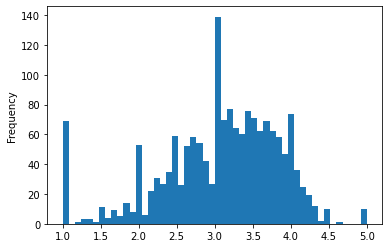

In [18]:
movies_mean_count['mean'].plot(kind = 'hist',bins=50)

<AxesSubplot:ylabel='Density'>

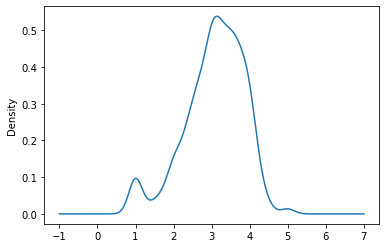

In [19]:
movies_mean_count['mean'].plot(kind = 'density')

<AxesSubplot:ylabel='Frequency'>

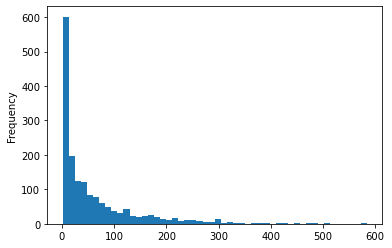

In [20]:
movies_mean_count['count'].plot(kind = 'hist',bins=50)

<AxesSubplot:ylabel='Density'>

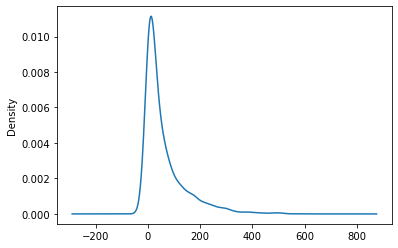

In [21]:
movies_mean_count['count'].plot(kind = 'density')

In [22]:
movies_mean_count[movies_mean_count['mean']==1]

,mean,count
title,,
3 Ninjas: High Noon At Mega Mountain (1998),1.0,5.0
Amityville 1992: It's About Time (1992),1.0,5.0
Amityville: A New Generation (1993),1.0,5.0
Amityville: Dollhouse (1996),1.0,3.0
August (1996),1.0,1.0
...,...,...
"Very Natural Thing, A (1974)",1.0,1.0
"Vie est belle, La (Life is Rosey) (1987)",1.0,1.0
Wend Kuuni (God's Gift) (1982),1.0,1.0


In [23]:
movies_mean_count.sort_values('mean',ascending=False).head(50)

,mean,count
title,,
They Made Me a Criminal (1939),5.000000,1.0
Marlene Dietrich: Shadow and Light (1996),5.000000,1.0
"Saint of Fort Washington, The (1993)",5.000000,2.0
Someone Else's America (1995),5.000000,1.0
Star Kid (1997),5.000000,3.0
"Great Day in Harlem, A (1994)",5.000000,1.0
Aiqing wansui (1994),5.000000,1.0
Santa with Muscles (1996),5.000000,2.0
Prefontaine (1997),5.000000,3.0


In [24]:
movies_mean_count.sort_values('count',ascending=False).head(50)

,mean,count
title,,
Star Wars (1977),4.359589,584.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
"English Patient, The (1996)",3.656965,481.0
Scream (1996),3.441423,478.0
Toy Story (1995),3.878319,452.0
Air Force One (1997),3.631090,431.0


In [25]:
user_movie_matrix = pd.pivot_table(data=movies , index='user_id', columns='title', values='rating')

In [26]:
user_movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
user_movie_matrix['Titanic (1997)']

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [34]:
titanic = user_movie_matrix['Titanic (1997)']
titanic.describe()

count    350.000000
mean       4.245714
std        0.946822
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Titanic (1997), dtype: float64

<AxesSubplot:ylabel='Frequency'>

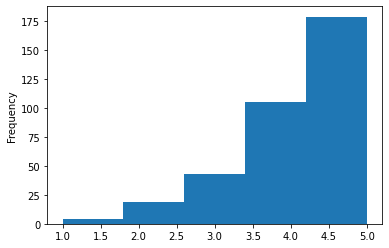

In [39]:
titanic.plot(kind='hist',bins=5)

In [42]:
starwars = user_movie_matrix['Star Wars (1977)']
starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [43]:
starwars.describe()

count    584.000000
mean       4.359589
std        0.880985
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Star Wars (1977), dtype: float64

<AxesSubplot:ylabel='Frequency'>

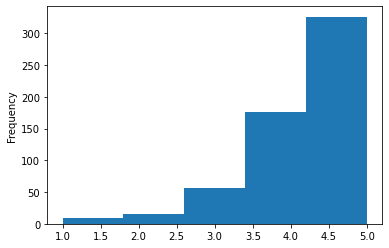

In [44]:
starwars.plot(kind='hist',bins=5)

In [70]:
user_movie_matrix = pd.pivot_table(data=movies , index='user_id', columns='title', values='rating')

In [71]:
user_movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
user_movie_matrix['Titanic (1997)']

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [102]:
titanic_corr = pd.DataFrame(user_movie_matrix.corrwith(titanic),columns=['correlation'])
titanic_corr
# titanic_corr.sort_values('correlation',ascending=False)

C:\Users\david\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\david\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [116]:
titanic_corr = pd.concat([titanic_corr,movies_mean_count['count']],axis=1)

In [117]:
titanic_corr

,correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
...,...,...
Young Guns II (1990),0.317274,44.0
"Young Poisoner's Handbook, The (1995)",0.356783,41.0
Zeus and Roxanne (1997),NaN,6.0


In [135]:
titanic_corr.sort_values(['correlation','count'],ascending=False)

,correlation,count
title,,
Titanic (1997),1.0,350.0
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
Purple Noon (1960),1.0,7.0
Year of the Horse (1997),1.0,7.0
...,...,...
Witness (1985),NaN,1.0
"Woman in Question, The (1950)",NaN,1.0
Yankee Zulu (1994),NaN,1.0


In [133]:
titanic_corr[(titanic_corr['correlation']>.5) & (titanic_corr['count']>50)].sort_values('correlation',ascending=False)

,correlation,count
title,,
Titanic (1997),1.000000,350.0
"Adventures of Robin Hood, The (1938)",0.597532,67.0
Mallrats (1995),0.580393,54.0
Robin Hood: Men in Tights (1993),0.533114,56.0
Manon of the Spring (Manon des sources) (1986),0.523459,58.0
Weekend at Bernie's (1989),0.508548,60.0


In [138]:
starwars_corr = pd.DataFrame(user_movie_matrix.corrwith(starwars),columns=['correlation'])

C:\Users\david\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\david\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [143]:
starwars_corr = pd.concat([starwars_corr,movies_mean_count['count']],axis=1)

In [144]:
starwars_corr[(starwars_corr['correlation']>.5) & (starwars_corr['count']>50)].sort_values('correlation',ascending=False)

,correlation,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0


In [156]:
movie_corr = user_movie_matrix.corr(min_periods=50)
movie_corr

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,0.096546,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
my_ratings = pd.read_csv("My_Ratings.csv")

In [158]:
my_ratings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [185]:
similar_movies_list = pd.Series()
for i in range(2):
    similar_movie = movie_corr[my_ratings['Movie Name'][i]].dropna() # Get same movies with same ratings
    similar_movie = similar_movie.map(lambda x: x * my_ratings['Ratings'][i]) # Scale the similarity by your given ratings
    similar_movies_list = similar_movies_list.append(similar_movie)

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [186]:
similar_movies_list.sort_values(inplace = True, ascending = False)
similar_movies_list.head(10)

Liar Liar (1997)         5.000000
Batman Forever (1995)    2.584838
Bean (1997)              2.523447
Mask, The (1994)         2.423249
Down Periscope (1996)    2.363403
Con Air (1997)           2.349141
Pretty Woman (1990)      2.348951
101 Dalmatians (1996)    2.348824
Demolition Man (1993)    2.214741
Michael (1996)           2.210110
dtype: float64